<a href="https://colab.research.google.com/github/risa0122/HanaBank/blob/main/youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/risa0122/HanaBank.git

Cloning into 'HanaBank'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 한글 폰트 문제
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 


In [ ]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from konlpy.tag import Hannanum
from apyori import apriori

In [ ]:
# 영상 텍스트 불러오기
#"C:\Users\user\Downloads\test1.txt"
f = open('/content/j1.txt', 'r', encoding='UTF-8')
#f = open('/content/test1.txt','r',encoding='UTF-8')
lines = f.readlines()
f.close()


In [ ]:
hannanum = Hannanum()

In [ ]:
dataset = []
for i in range(len(lines)):
  dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]','',lines[i])))
dataset[:10]

[['간편해서'], [], [], [], ['피드'], [], ['피드'], [], [], []]

In [ ]:
#에이 프라이어리
result = (list(apriori(dataset, min_support=0.011))) #지지도 0.001
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length']==2) & (df['support']>=0.011)].sort_values(by='support',ascending=False)
df.head(10)

,items,support,ordered_statistics,length
14,"(뒤, 시간)",0.041451,"[((), (뒤, 시간), 0.04145077720207254, 1.0), ((뒤)...",2
22,"(후, 시간)",0.041451,"[((), (후, 시간), 0.04145077720207254, 1.0), ((시간...",2
17,"(때문, 시간)",0.031088,"[((), (때문, 시간), 0.031088082901554404, 1.0), ((...",2
21,"(스토리, 피드)",0.025907,"[((), (스토리, 피드), 0.025906735751295335, 1.0), (...",2
15,"(때문, 부담)",0.015544,"[((), (때문, 부담), 0.015544041450777202, 1.0), ((...",2
16,"(스토리, 때문)",0.015544,"[((), (스토리, 때문), 0.015544041450777202, 1.0), (...",2
18,"(피드, 때문)",0.015544,"[((), (피드, 때문), 0.015544041450777202, 1.0), ((...",2
19,"(피드, 부담)",0.015544,"[((), (피드, 부담), 0.015544041450777202, 1.0), ((...",2
20,"(스토리, 시간)",0.015544,"[((), (스토리, 시간), 0.015544041450777202, 1.0), (...",2


In [ ]:
# 네트워크 그래프
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [ ]:
# 페이지랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [ ]:
# 레이아웃
pos = nx.planar_layout(G)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


In [ ]:
'''
# 한글 폰트 문제

import matplotlib.font_manager as fm
import matplotlib as mpl
from matplotlib import rc

font_name = fm.FontProperties(fname='/content/NanumBarunGothic.ttf').get_name()


plt.rc('font', family=font_name)
mpl.font_manager._rebuild()

print(font_name)

'''

"\n# 한글 폰트 문제\n\nimport matplotlib.font_manager as fm\nimport matplotlib as mpl\nfrom matplotlib import rc\n\nfont_name = fm.FontProperties(fname='/content/NanumBarunGothic.ttf').get_name()\n\n\nplt.rc('font', family=font_name)\nmpl.font_manager._rebuild()\n\nprint(font_name)\n\n"

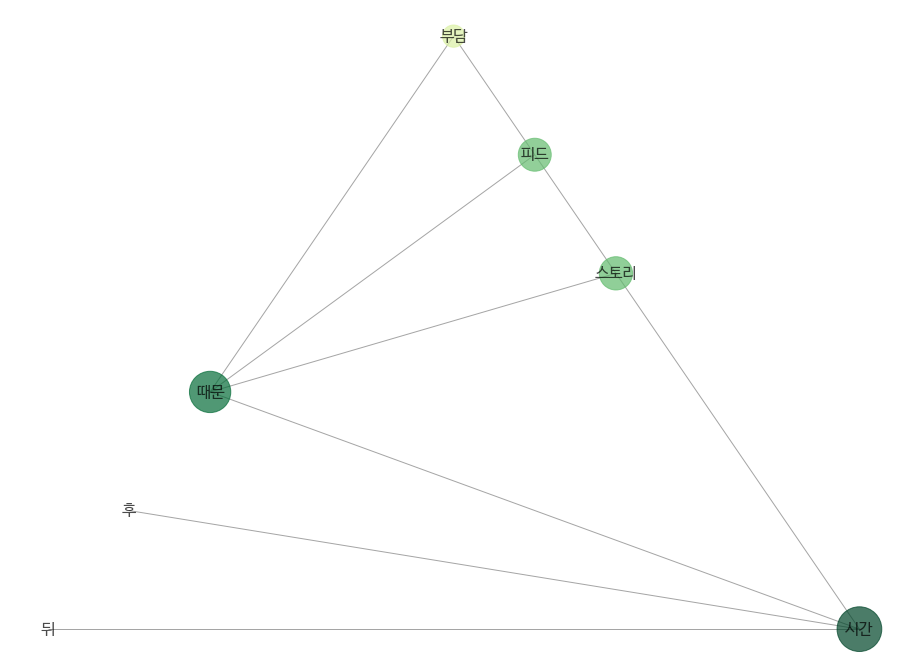

In [ ]:
# 네트워크 그래프
plt.figure(figsize=(16,12)); plt.axis('off')

#nx.draw_networkx_labels(G,pos,G_label,font_family=font_name,font_size=16)
'''
nx.draw_networkx_labels(G, pos, font_family='NanumBarunGothic', font_size=10)
nx.draw_networkx(G, font_family=font_name, font_size=16,
                 pos =pos, node_color = list(pr.values()), node_size=nsize,
                 alpha = 0.7, edge_color='.5', cmap=plt.cm.YlGn)
'''


#nx.draw_networkx_labels(G, pos, font_family='NanumBarunGothic', font_size=10)
nx.draw_networkx(G, font_family='NanumBarunGothic', font_size=16,
                 pos =pos, node_color = list(pr.values()), node_size=nsize,
                 alpha = 0.7, edge_color='.5', cmap=plt.cm.YlGn)

plt.savefig('last2.png', bbox_inches='tight')